# CPSC 330 Lecture 4

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

I have downloaded the [IMDB movie review dataset](https://www.kaggle.com/utathya/imdb-review-dataset) from Kaggle.

In [8]:
imdb_df = pd.read_csv('./data/imdb_master.csv',index_col=0, encoding='unicode_escape')

In [9]:
imdb_df["label"].value_counts()

unsup    50000
neg      25000
pos      25000
Name: label, dtype: int64

keep the pos and neg reviews only

In [10]:
imdb_df= imdb_df[imdb_df['label'].str.startswith(('pos','neg'))]
imdb_df["label"].value_counts()

neg    25000
pos    25000
Name: label, dtype: int64

In [11]:
imdb_df = imdb_df.sample(frac=0.2, random_state=999)
imdb_df

,type,review,label,file
12438,test,As Jennifer Denuccio used to say on Square Peg...,neg,9946_2.txt
5705,test,"With Knightly and O'Tool as the leads, this fi...",neg,3886_3.txt
11675,test,"Take a bad script, some lousy acting and throw...",neg,9259_1.txt
9824,test,Strange things happen to Americans Will (Greg ...,neg,7593_3.txt
22581,test,"Sometimes, you're up late at night flipping th...",pos,7824_7.txt
...,...,...,...,...
31555,train,With a cast of stalwart British character acto...,neg,4650_2.txt
36478,train,There's a lot of movies that have set release ...,neg,9081_1.txt
35878,train,Welcome to movie 17 on the chilling classics 5...,neg,8541_1.txt
16040,test,"This is a forgotten classic of a film, and Har...",pos,1937_10.txt


here, we just have reviews as raw text:

In [12]:
imdb_df.loc[1,"review"]

"This is an example of why the majority of action films are the same. Generic and boring, there's really nothing worth watching here. A complete waste of the then barely-tapped talents of Ice-T and Ice Cube, who've each proven many times over that they are capable of acting, and acting well. Don't bother with this one, go see New Jack City, Ricochet or watch New York Undercover for Ice-T, or Boyz n the Hood, Higher Learning or Friday for Ice Cube and see the real deal. Ice-T's horribly cliched dialogue alone makes this film grate at the teeth, and I'm still wondering what the heck Bill Paxton was doing in this film? And why the heck does he always play the exact same character? From Aliens onward, every film I've seen with Bill Paxton has him playing the exact same irritating character, and at least in Aliens his character died, which made it somewhat gratifying...<br /><br />Overall, this is second-rate action trash. There are countless better films to see, and if you really want to s

We need a way to transform this raw text into use usual tabular format, where each column is a feature... hmm... 🤔

How about this: each word is a feature (column), and we check whether the word is present or absent in the review 💡

Make a `CountVectorizer` object:

In [13]:
vec= CountVectorizer(max_features=1000,binary=True)
#  `binary=True` means just check whether a word is present (1) or absent (0), instead of counting the number of occurrences of the word.

In [14]:
X = vec.fit_transform(imdb_df["review"])

In [15]:
X.shape

(10000, 1000)

In [16]:
data_df = pd.DataFrame(data=X.toarray(), columns=vec.get_feature_names_out());
data_df

,10,20,30,80,able,about,above,absolutely,across,act,...,wrong,year,years,yes,yet,york,you,young,your,yourself
0,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,1,0,1,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,1,0
9997,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [17]:
y = imdb_df['label']
y

12438    neg
5705     neg
11675    neg
9824     neg
22581    pos
        ... 
31555    neg
36478    neg
35878    neg
16040    pos
12996    pos
Name: label, Length: 10000, dtype: object

Ok, now we split the data...

In [18]:
X_train_imdb, X_test_imdb, y_train_imdb, y_test_imdb = train_test_split(X, y, random_state = 123)

Ok, this seems reasonable. Are we all good?

### NO!!
- Remember, the test data should be **unseen** data.
- Here, the test data influenced how we preprocessed the training data:
  - We used it to determine which words were the top words.
  - In fact, some of our features might be words that don't even appear in the training set!!
  - Thus, **the test error is no longer an accurate measure of how our model generalizes to unsees data**.
- This is called The Golden Rule of ML

Back to our dataset. We need to start over...

In [23]:
imdb_df= pd.read_csv("./data/imdb_master.csv", index_col=0, encoding="unicode_escape")
imdb_df= imdb_df[ imdb_df["label"].str.startswith(("pos","neg"))]
imdb_df=imdb_df.sample(frac=0.2, random_state=999)
imdb_df.head()

,type,review,label,file
12438,test,As Jennifer Denuccio used to say on Square Peg...,neg,9946_2.txt
5705,test,"With Knightly and O'Tool as the leads, this fi...",neg,3886_3.txt
11675,test,"Take a bad script, some lousy acting and throw...",neg,9259_1.txt
9824,test,Strange things happen to Americans Will (Greg ...,neg,7593_3.txt
22581,test,"Sometimes, you're up late at night flipping th...",pos,7824_7.txt


In [37]:
X= imdb_df["review"]
y= imdb_df["label"]
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, random_state=123)

In [38]:
vec = CountVectorizer(min_df=50, binary=True)

In [39]:
X_train= vec.fit_transform(X_train_raw)

In [40]:
X_train_df= pd.DataFrame(data= X_train.toarray(), columns=vec.get_feature_names_out())
X_train_df

,000,10,100,11,12,13,15,1950,1970,20,...,yet,york,you,young,younger,your,yourself,youth,zero,zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
7496,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [41]:
X_test= vec.transform(X_test_raw)

In [42]:
# lets try decision tree
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

1.0

In [43]:
dt.score(X_test, y_test)

0.6852

obvious overfitting

## Logistic regression:

In [44]:
from sklearn.dummy import DummyClassifier
dc=DummyClassifier(strategy="prior")

In [46]:
dc.fit(X_train, y_train)
dc.score(X_train,y_train)

0.5024

In [48]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train);

In [50]:
lr.score(X_train, y_train)

0.9834666666666667

In [51]:
lr.score(X_test, y_test)

0.8256

Cool, we got a better test error this way!

#### Predicting probabilities

In [53]:
lr.classes_

array(['neg', 'pos'], dtype=object)

In [54]:
probs= lr.predict_proba(X_test)
probs

array([[2.77059928e-02, 9.72294007e-01],
       [2.45078038e-01, 7.54921962e-01],
       [2.97974895e-05, 9.99970203e-01],
       ...,
       [3.45880150e-02, 9.65411985e-01],
       [3.67464772e-02, 9.63253523e-01],
       [1.23418995e-02, 9.87658101e-01]])

In [56]:
lr.predict_proba(X_test)[:,1]

array([0.97229401, 0.75492196, 0.9999702 , ..., 0.96541199, 0.96325352,
       0.9876581 ])

What's the most positive review according to our classifier?  


In [57]:
np.max(lr.predict_proba(X_test)[:,1])

0.999999999997766

Wow! Let's find that review:

In [60]:
max_positive_index = np.argmax(lr.predict_proba(X_test)[:,1])
X_test_raw.iloc[max_positive_index]

'"Pitch Black" was a complete shock to me when I first saw it back in 2000. In the previous years, I was repeatedly disappointed by all the lame sci-fi movies (Ex: STARSHIP TROOPERS) and thought that this movie wouldn\'t be any different. But to plainly put it: This movie freaked me out... in a good way. I wasn\'t aware that I was still afraid of the dark till I watched this movie; I must have buried my fear in the back of my subconscious when I was a kid and it rightfully deserves to stay there.<br /><br />The alien creatures sent shivers up my spine; the individual(s) who designed them have a twisted but brilliant and creative imagination to come up with something so impressive and grotesque. <br /><br />I loved how the writers gave each main character a history and showed their flaws and strengths without much confusion.<br /><br />Riddick\'s (Vin Diesel) gift for escaping out of any impossible situation and putting up a hell of a fight was jaw dropping. At first, you figure him out

## Logistic regression: coefficients and interpretation 

In [112]:
weights= lr.coef_
weights= weights.reshape(-1,1)

In [113]:
vocab= vec.get_feature_names_out()
vocab = vocab.reshape(-1,1)

In [115]:
data= np.hstack([vocab, weights])

In [117]:
words_weights_df = pd.DataFrame(data=data, columns=["word", "weight"])
words_weights_df

,word,weight
0,000,-0.697899
1,10,0.686752
2,100,0.020449
3,11,-0.15284
4,12,0.595231
...,...,...
2568,your,0.015545
2569,yourself,0.175841
2570,youth,-0.732695
2571,zero,-0.550108


In [118]:
words_weights_df.sort_values(by="weight", ascending=False)

,word,weight
1658,perfect,1.729919
2098,spectacular,1.620717
107,amazing,1.600131
1368,loved,1.579315
2211,surprisingly,1.562431
...,...,...
1712,poorly,-2.015419
1443,mess,-2.067447
202,awful,-2.137437
1289,laughable,-2.204828


- These coefficients make sense!
- Let's use this to explore one of the test cases:

In [120]:
ex=5
lr.predict_proba(X_test)[ex,1]

0.9993084807660099

In [124]:
lr.predict(X_test)[ex]

'pos'

In [125]:
X_test_raw.iloc[ex]

'As a convert into the Church of Jesus Christ of Latter Day Saints, I try to absorb as much as I can of my new religion\'s history. I was invited to attend a showing of this film with my sons & the other young men & women as well as their families of our ward. <br /><br />On a beautiful spring evening, we drove to Kirtland, Ohio to the church\'s historical village located there. We were to have had reservations at the Vistor\'s Center to view this movie. Since my movie viewing was limited to only a few church documentaries, I was intrigued. The only "full length motion pictures" of the church\'s I had seen was "Legacy" and "My Best Two Years", both which I thought were very well written and preformed.<br /><br />At the beginning, the missionary interpretor passed out tissues stating that several people had been deeply moved to the point of tears by this movie. I thought "OK...but it takes a lot to move me to tears." Imagine my surprise when I found myself sobbing! It truly is a very mo

We can find which of the vocabulary words are present in this review:

In [127]:
words_in_ex = X_test[ex].toarray().ravel().astype(bool)
words_in_ex

array([False, False, False, ..., False, False, False])

In [128]:
np.sum(words_in_ex)

94

In [130]:
np.array(vocab)[words_in_ex].ravel()

array(['and', 'as', 'at', 'beautiful', 'been', 'beginning', 'believe',
       'best', 'both', 'br', 'but', 'by', 'can', 'center', 'church',
       'day', 'deeply', 'evening', 'families', 'few', 'film', 'found',
       'full', 'had', 'have', 'historical', 'history', 'imagine', 'in',
       'into', 'is', 'it', 'latter', 'length', 'limited', 'lot', 'me',
       'men', 'message', 'motion', 'move', 'moved', 'movie', 'moving',
       'much', 'my', 'myself', 'new', 'of', 'ok', 'on', 'only', 'other',
       'our', 'out', 'passed', 'people', 'pictures', 'point', 'powerful',
       'see', 'seen', 'several', 'showing', 'since', 'smith', 'surprise',
       'takes', 'tears', 'that', 'the', 'their', 'there', 'this',
       'thought', 'to', 'truly', 'try', 'two', 'very', 'view', 'viewing',
       'village', 'was', 'we', 'well', 'were', 'when', 'which', 'with',
       'women', 'written', 'years', 'young'], dtype=object)

In [133]:
ex_df= pd.DataFrame(data= data[words_in_ex], columns=["word", "weight"])
ex_df

,word,weight
0,and,0.027306
1,as,0.087798
2,at,-0.053557
3,beautiful,0.84986
4,been,-0.358438
...,...,...
89,with,0.184523
90,women,-0.393789
91,written,0.135406
92,years,0.65255


In [135]:
ex_df["weight"].sum()

6.460132836525183

- The more positive this value is, the closer to 1 the predicted probability would be. 
- Also, the more negative this value is, the closer to 0 the predicted probability would be. 
  - If this value were exactly 0, the predicted probability would be exactly 0.5.

An important hyperparameter: `C` (default is `C=1.0`).

In [136]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.9834666666666667

In [137]:
lr.score(X_test, y_test) 

0.8256

In [138]:
lr = LogisticRegression(max_iter=1000, C=10000)
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

1.0

In [139]:
lr.score(X_test, y_test) 

0.8048

Above: higher `C` leads to more overfitting.

In [140]:
lr = LogisticRegression(C=0.01)
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.8949333333333334

In [141]:
lr.score(X_test, y_test) 

0.8416

Above: lower `C` leads to less overfitting.

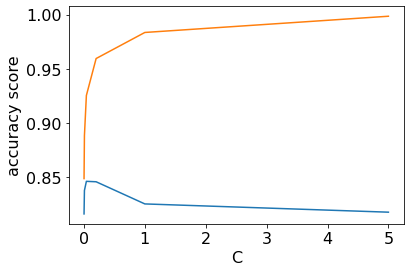

In [142]:
C_vals = 5.0**np.arange(-4,2)
scores = []
scores_train = []
for C in C_vals:
    lr = LogisticRegression(max_iter=1000, C=C)
    lr.fit(X_train, y_train)
    score_train = lr.score(X_train, y_train)
    score = lr.score(X_test, y_test)
    scores.append(score)
    scores_train.append(score_train)
plt.plot(C_vals, scores);
plt.plot(C_vals, scores_train);
plt.xlabel("C");
plt.ylabel("accuracy score");